### INDEX No: 190072E
### Name : E.M.D.A Bandara

In [12]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

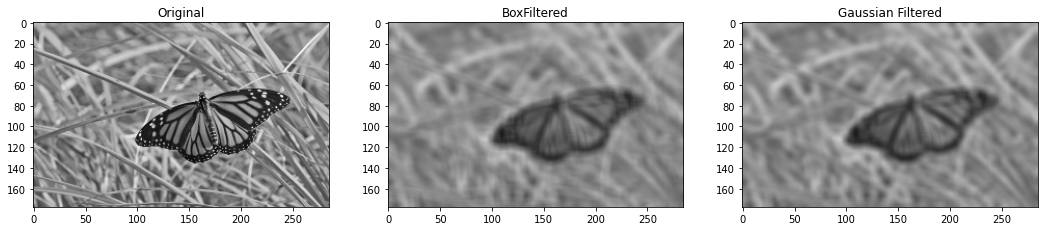

In [11]:
img = cv.imread('images/butterfly.jpg' , cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img is not None


k_size = 9
sigma = 4
box_kernel = 1/81*np.ones((k_size,k_size))
im_avg = cv.filter2D(img, -1, box_kernel)
im_gaussian = cv.GaussianBlur(img, (k_size , k_size) , sigma)

fig, ax = plt.subplots( 1, 3, figsize = (18, 6))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(im_avg, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('BoxFiltered')
ax[2].imshow(im_gaussian, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].set_title('Gaussian Filtered')
plt.show()


(-5.499999999999998, 5.499999999999963, -5.499999999999998, 5.499999999999963)

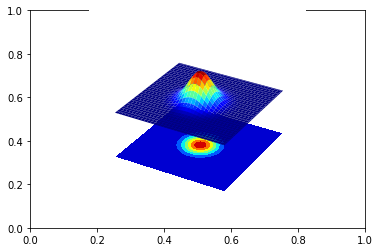

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection = '3d')

step = 0.1
X = np.arange(-5, 5 + step, step)
Y = np.arange(-5, 5 + step, step)

XX, YY = np.meshgrid(X, Y)
sigma = 1
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))


surf = ax.plot_surface(XX, YY, g, cmap = cm.jet)
cset = ax.contourf(XX, YY, g, zdir = 'z', offset = np.min(g) - 1.5, cmap = cm.jet)
ax.set_zlim(np.min(g) -2, np.max(g))
plt.axis('off')



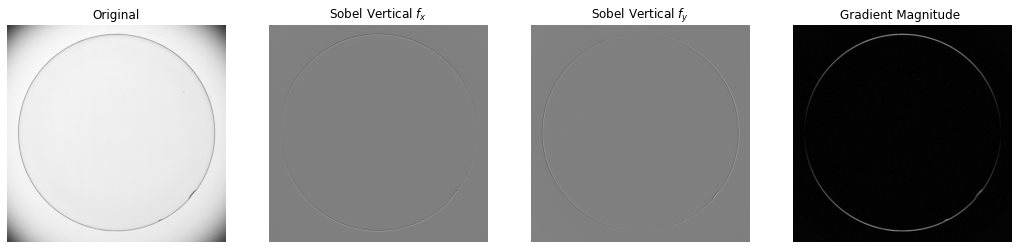

In [2]:
img = cv.imread('images/contact_lens.tif' , cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

f_x = cv.filter2D(img, -1, sobel_vertical)
f_y = cv.filter2D(img, -1, sobel_horizontal)
grad_mag = np.sqrt(f_x**2, f_y**2)

fig, ax = plt.subplots( 1, 4, figsize = (18, 6))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(f_x, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[1].set_title('Sobel Vertical $f_x$')
ax[2].imshow(f_y, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].set_title('Sobel Vertical $f_y$')
ax[3].imshow(grad_mag, cmap = 'gray')
ax[3].set_title('Gradient Magnitude ')

for i in  range(4):
    ax[i].axis('off')

plt.show()

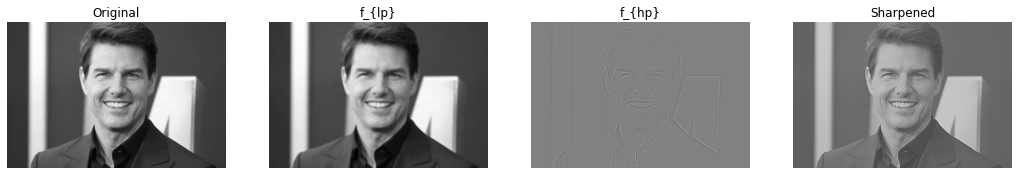

In [10]:
f= cv.imread('images/tom.jpg' , cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None   

sigma = 2
gaussian_1d = cv.getGaussianKernel(5, sigma)
f_lp = cv.sepFilter2D(f, -1, gaussian_1d, gaussian_1d)
f_hp = f - f_lp
f_sharpened = cv.addWeighted(f, 1.0, f_hp, 2.0, 0)

fig, ax = plt.subplots( 1, 4, figsize = (18, 6))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original')
ax[1].imshow(f_lp, cmap = 'gray')
ax[1].set_title('f_{lp}')
ax[2].imshow(f_hp, cmap = 'gray')
ax[2].set_title('f_{hp}')
ax[3].imshow(f_sharpened, cmap = 'gray')
ax[3].set_title('Sharpened')

for i in  range(4):
    ax[i].axis('off')

plt.show()